<a href="https://colab.research.google.com/github/Mandloi1/projectwork/blob/master/Scratch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Useful Libraries**

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras. metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from tensorflow.keras.optimizers import RMSprop

In [23]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs Available:  1


In [24]:
train_path = "/content/drive/My Drive/NEU_New/train"
valid_path = "/content/drive/My Drive/NEU_New/valid"
test_path =  "/content/drive/My Drive/NEU_New/test"

**First Sperate a portion of data for Training and Testing**

In [25]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches'], batch_size=10)


Found 1620 images belonging to 6 classes.
Found 120 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


In [26]:
assert train_batches.n == 1620
assert valid_batches.n == 120
assert test_batches.n == 60
assert train_batches.num_classes == valid_batches.num_classes ==test_batches.num_classes == 6


**CNN Architecture from scratch **

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 110, 110, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 53, 53, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)            

In [28]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
print('Compiled!')

Compiled!


In [29]:
history = model.fit(x = train_batches, batch_size = 10, epochs=10, validation_data=valid_batches,verbose=2, shuffle=False)

Epoch 1/10
162/162 - 4s - loss: 6.1128 - accuracy: 0.4401 - val_loss: 1.1006 - val_accuracy: 0.5583
Epoch 2/10
162/162 - 4s - loss: 0.8990 - accuracy: 0.6531 - val_loss: 0.6389 - val_accuracy: 0.7917
Epoch 3/10
162/162 - 4s - loss: 0.6043 - accuracy: 0.7883 - val_loss: 0.4347 - val_accuracy: 0.8833
Epoch 4/10
162/162 - 4s - loss: 0.4239 - accuracy: 0.8586 - val_loss: 0.3489 - val_accuracy: 0.9000
Epoch 5/10
162/162 - 4s - loss: 0.2898 - accuracy: 0.9056 - val_loss: 0.2127 - val_accuracy: 0.9500
Epoch 6/10
162/162 - 4s - loss: 0.2840 - accuracy: 0.9056 - val_loss: 0.4212 - val_accuracy: 0.8917
Epoch 7/10
162/162 - 4s - loss: 0.2440 - accuracy: 0.9154 - val_loss: 0.2826 - val_accuracy: 0.9333
Epoch 8/10
162/162 - 4s - loss: 0.1931 - accuracy: 0.9358 - val_loss: 0.4990 - val_accuracy: 0.8500
Epoch 9/10
162/162 - 4s - loss: 0.1751 - accuracy: 0.9469 - val_loss: 0.2648 - val_accuracy: 0.8917
Epoch 10/10
162/162 - 4s - loss: 0.1761 - accuracy: 0.9451 - val_loss: 0.2235 - val_accuracy: 0.9500

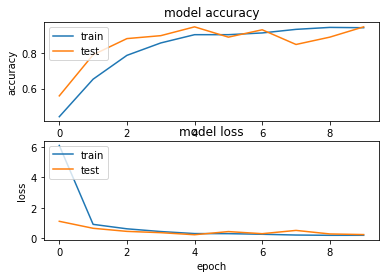

In [37]:
import matplotlib.pyplot as plt 
plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [38]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [39]:
predictions = model.predict(x=test_batches, verbose=1)

6/6 [==============================] - 0s 20ms/step


In [40]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [42]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
       print("Normalized confusion matrix")
    else:
       print("Confusion matrix, without normalization ")
    
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

In [43]:
test_batches.class_indices

{'Crazing': 0,
 'Inclusion': 1,
 'Patches': 2,
 'Pitted': 3,
 'Rolled': 4,
 'Scratches': 5}

Confusion matrix, without normalization 
[[1 1 2 1 3 2]
 [2 1 4 1 2 0]
 [1 1 3 2 2 1]
 [3 2 0 1 3 1]
 [2 1 2 2 2 1]
 [1 2 0 2 1 4]]


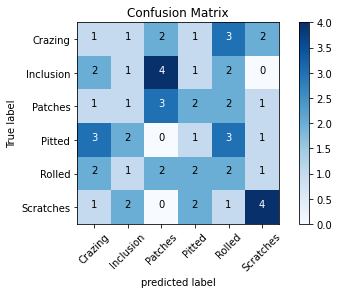

In [44]:
cm_plot_labels = ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
